# Supplementary Tables: Accuracy

In [1]:
import matplotlib.pyplot as plt
import h5py
import EIANN as eiann
import EIANN.utils as ut
from EIANN.generate_figures import *

eiann.update_plot_defaults()
root_dir = ut.get_project_root()
model_dict_all = load_model_dict()

In [2]:
def latex_to_unicode(text):
    """
    Convert LaTeX-formatted text to Unicode for Excel display.
    Handles Greek letters, superscripts, and subscripts.
    """
    import re

    if isinstance(text, float):
        return str(int(text))
    elif not isinstance(text, str):
        return text
    
    # Greek letters mapping
    greek_letters = {
        r'\\alpha': 'α', r'\\beta': 'β', r'\\gamma': 'γ', r'\\delta': 'δ',
        r'\\epsilon': 'ε', r'\\zeta': 'ζ', r'\\eta': 'η', r'\\theta': 'θ',
        r'\\iota': 'ι', r'\\kappa': 'κ', r'\\lambda': 'λ', r'\\mu': 'μ',
        r'\\nu': 'ν', r'\\xi': 'ξ', r'\\pi': 'π', r'\\rho': 'ρ',
        r'\\sigma': 'σ', r'\\tau': 'τ', r'\\upsilon': 'υ', r'\\phi': 'φ',
        r'\\chi': 'χ', r'\\psi': 'ψ', r'\\omega': 'ω',
        r'\\Alpha': 'Α', r'\\Beta': 'Β', r'\\Gamma': 'Γ', r'\\Delta': 'Δ',
        r'\\Epsilon': 'Ε', r'\\Zeta': 'Ζ', r'\\Eta': 'Η', r'\\Theta': 'Θ',
        r'\\Iota': 'Ι', r'\\Kappa': 'Κ', r'\\Lambda': 'Λ', r'\\Mu': 'Μ',
        r'\\Nu': 'Ν', r'\\Xi': 'Ξ', r'\\Pi': 'Π', r'\\Rho': 'Ρ',
        r'\\Sigma': 'Σ', r'\\Tau': 'Τ', r'\\Upsilon': 'Υ', r'\\Phi': 'Φ',
        r'\\Chi': 'Χ', r'\\Psi': 'Ψ', r'\\Omega': 'Ω'
    }
    
    # Superscript mapping
    superscript_map = { '0': '⁰', '1': '¹', '2': '²', '3': '³', '4': '⁴',
                        '5': '⁵', '6': '⁶', '7': '⁷', '8': '⁸', '9': '⁹',
                        'a': 'ᵃ', 'b': 'ᵇ', 'c': 'ᶜ', 'd': 'ᵈ', 'e': 'ᵉ',
                        'f': 'ᶠ', 'g': 'ᵍ', 'h': 'ʰ', 'i': 'ⁱ', 'j': 'ʲ',
                        'k': 'ᵏ', 'l': 'ˡ', 'm': 'ᵐ', 'n': 'ⁿ', 'o': 'ᵒ',
                        'p': 'ᵖ', 'r': 'ʳ', 's': 'ˢ', 't': 'ᵗ', 'u': 'ᵘ',
                        'v': 'ᵛ', 'w': 'ʷ', 'x': 'ˣ', 'y': 'ʸ', 'z': 'ᶻ',
                        'A': 'ᴬ', 'B': 'ᴮ', 'D': 'ᴰ', 'E': 'ᴱ', 'G': 'ᴳ',
                        'H': 'ᴴ', 'I': 'ᴵ', 'J': 'ᴶ', 'K': 'ᴷ', 'L': 'ᴸ',
                        'M': 'ᴹ', 'N': 'ᴺ', 'O': 'ᴼ', 'P': 'ᴾ', 'R': 'ᴿ',
                        'T': 'ᵀ', 'U': 'ᵁ', 'V': 'ⱽ', 'W': 'ᵂ',
                        '+': '⁺', '-': '⁻', '=': '⁼', '(': '⁽', ')': '⁾'}
                    
    # Subscript mapping
    subscript_map= {'0': '₀', '1': '₁', '2': '₂', '3': '₃', '4': '₄',
                    '5': '₅', '6': '₆', '7': '₇', '8': '₈', '9': '₉',
                    'a': 'ₐ', 'e': 'ₑ', 'h': 'ₕ', 'i': 'ᵢ', 'j': 'ⱼ',
                    'k': 'ₖ', 'l': 'ₗ', 'm': 'ₘ', 'n': 'ₙ', 'o': 'ₒ',
                    'p': 'ₚ', 'r': 'ᵣ', 's': 'ₛ', 't': 'ₜ', 'u': 'ᵤ',
                    'v': 'ᵥ', 'x': 'ₓ',
                    '+': '₊', '-': '₋', '=': '₌', '(': '₍', ')': '₎'}
    
    # Remove math mode delimiters
    text = re.sub(r'\$([^\$]+)\$', r'\1', text)
    
    # Replace Greek letters
    for latex, unicode_char in greek_letters.items():
        text = text.replace(latex, unicode_char)
    
    # Handle superscripts with braces: ^{...}
    def replace_superscript_braces(match):
        content = match.group(1)
        return ''.join(superscript_map.get(c, c) for c in content)
    text = re.sub(r'\^\{([^}]+)\}', replace_superscript_braces, text)
    
    # Handle single character superscripts: ^T, ^2, etc.
    def replace_superscript_single(match):
        char = match.group(1)
        return superscript_map.get(char, '^' + char)
    text = re.sub(r'\^(.)', replace_superscript_single, text)
    
    # Handle subscripts with braces: _{...}
    def replace_subscript_braces(match):
        content = match.group(1)
        return ''.join(subscript_map.get(c, c) for c in content)
    text = re.sub(r'_\{([^}]+)\}', replace_subscript_braces, text)
    
    # Handle single character subscripts: _i, _j, etc.
    def replace_subscript_single(match):
        char = match.group(1)
        return subscript_map.get(char, '_' + char)
    text = re.sub(r'_(.)', replace_subscript_single, text)
    
    return text

In [3]:
def generate_model_summary_table(model_dict_all, model_list, figure_name, dataset="MNIST"):
    num_rows = len(model_list)
    fig, ax = plt.subplots(figsize=(7, num_rows*0.26 + 0.4))
    ax.axis('off')

    columns = {'display_name': 0.17, 'Architecture': 0.12, 
                'Hidden Layers': 0.12, 'Algorithm': 0.12, 
                'W Learning Rule': 0.17, 'B Learning Rule': 0.17, 'Bias': 0.08}
    table_vals = []

    for model_key in model_list:
        model_dict = model_dict_all[model_key]
        network_name = model_dict['config'].split('.')[0]
        hdf5_path = root_dir + f"/EIANN/data/model_hdf5_plot_data/plot_data_{network_name}.h5"
        network_table_vals = [model_dict[col] for col in columns.keys() if col in model_dict]
        with h5py.File(hdf5_path, 'r') as f:
            # print(f"Generating table for {network_name}")
            data_dict = f[network_name]

            # Get the accuracy for each seed
            accuracy_all_seeds = []
            for seed in model_dict['seeds']:
                accuracy_all_seeds.append(data_dict[seed]['test_accuracy_history'][-1])
            avg_accuracy = np.mean(accuracy_all_seeds)
            std_accuracy = np.std(accuracy_all_seeds)
            sem_accuracy = std_accuracy / np.sqrt(len(accuracy_all_seeds))

            accuracy_all_seeds_extended = []
            for seed in model_dict['seeds']:
                accuracy_all_seeds_extended.append(data_dict[seed]['test_accuracy_history_extended'][-1])
            avg_accuracy_extended = np.mean(accuracy_all_seeds_extended)
            std_accuracy_extended = np.std(accuracy_all_seeds_extended)
            sem_accuracy_extended = std_accuracy_extended / np.sqrt(len(accuracy_all_seeds_extended))

            if dataset == "MNIST":
                new_column_labels = ['MNIST Accuracy \n(20k samples)', 
                                        'MNIST Accuracy \n(50k samples)']
                network_table_vals += [f"{avg_accuracy:.2f} \u00b1 {sem_accuracy:.2f}", 
                                        f"{avg_accuracy_extended:.2f} \u00b1 {sem_accuracy_extended:.2f}"]
            elif dataset == "FMNIST":
                new_column_labels = ['FMNIST Accuracy \n(20k samples)', 
                                        'FMNIST Accuracy \n(50k samples)']
                network_table_vals += [f"{avg_accuracy:.2f} \u00b1 {sem_accuracy:.2f}", 
                                        f"{avg_accuracy_extended:.2f} \u00b1 {sem_accuracy_extended:.2f}"]
            elif dataset == "spiral":
                new_column_labels = ['Spiral Accuracy \n(1 epoch)', 
                                        'Spiral Accuracy \n(10 epochs)']
                network_table_vals += [f"{avg_accuracy:.2f} \u00b1 {sem_accuracy:.2f}", 
                                        f"{avg_accuracy_extended:.2f} \u00b1 {sem_accuracy_extended:.2f}"]
            elif dataset == "CIFAR10":
                new_column_labels = ['CIFAR10 Accuracy \n(20k samples)', 
                                        'CIFAR10 Accuracy \n(10 epochs)']
                network_table_vals += [f"{avg_accuracy:.2f} \u00b1 {sem_accuracy:.2f}", 
                                        f"{avg_accuracy_extended:.2f} \u00b1 {sem_accuracy_extended:.2f}"]

                
        table_vals.append(network_table_vals)

    column_labels = list(columns.keys()) + new_column_labels
    column_labels[0] = ""

    # Convert all table values to unicode
    table_vals_unicode = [[latex_to_unicode(val) for val in row] for row in table_vals]
    column_labels_unicode = [latex_to_unicode(col) for col in column_labels]
    
    # Create DataFrame and export to Excel
    df = pd.DataFrame(table_vals_unicode, columns=column_labels_unicode)

    # Export to Excel
    excel_path = f"{root_dir}/EIANN/data/{figure_name}.xlsx"
    df.to_excel(excel_path, index=False, sheet_name='Summary')
    
    # Create matplotlib table for PNG/SVG export
    table_vals = [[int(val) if isinstance(val, float) else val for val in row] for row in table_vals]
    col_widths = list(columns.values()) + [0.14, 0.14]
    table = ax.table(cellText=table_vals, colLabels=column_labels, cellLoc="center", loc="center", colWidths=col_widths)
    table.auto_set_font_size(False)

    for key, cell in table.get_celld().items():
        cell.set_linewidth(0)
        cell.set_height(cell.get_height() * 1.5)
        cell.set_text_props(fontname='Arial', fontsize=6)
        if key[0] == 0: # Header row
            cell.set_facecolor([0.9 for i in range(3)])
            cell.set_text_props(weight='bold')
            cell.set_height(cell.get_height() * 1.2)
        elif key[0] % 2 == 0: # Even rows
            cell.set_facecolor([0.96 for i in range(3)]) # make even rows light grey

        if key[1] == 0: # First column
            cell.set_text_props(horizontalalignment='left', weight='semibold')

    fig.savefig(f"{root_dir}/EIANN/figures/{figure_name}.png", dpi=300)

## MNIST accuracy Table

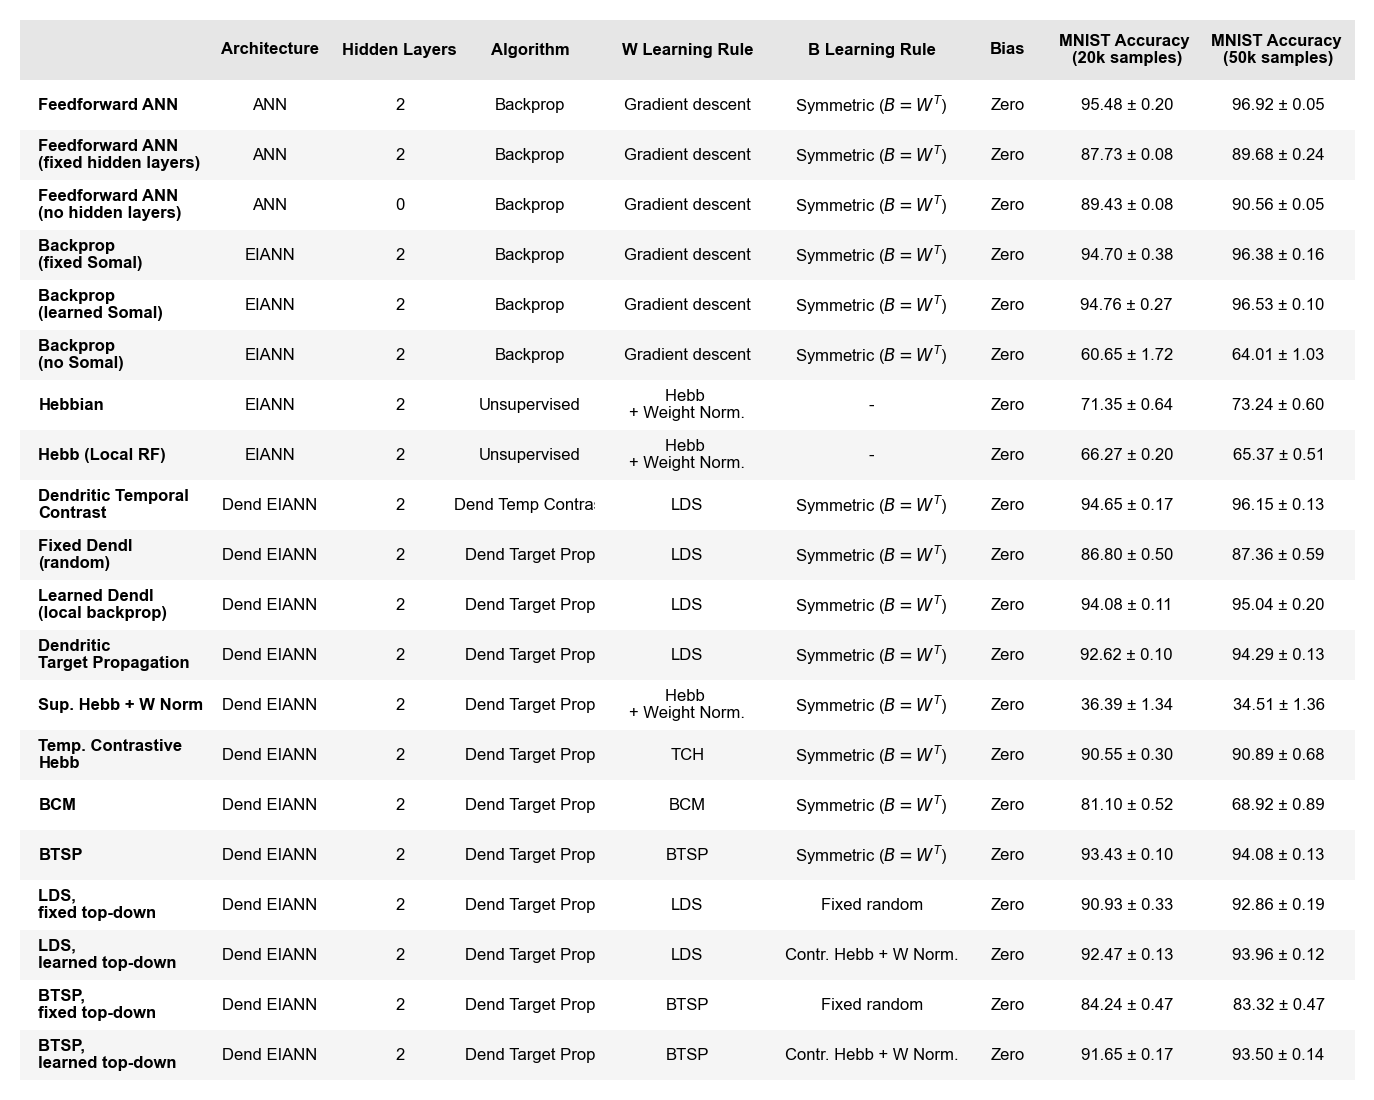

In [4]:
figure_name = "FigT1_mnist_table"
model_list = ["vanBP", "vanBP_fixed_hidden", "vanBP_0hidden",
              "bpDale_fixed", "bpDale_learned", "bpDale_noI", 
              "HebbWN_topsup", "HebbWN_topsup_lrf", "dend_temp_contrast_WT",
              "bpLike_WT_fixedDend", "bpLike_WT_localBP", "bpLike_WT_hebbdend", 
              "Supervised_HebbWN_WT_hebbdend", "SupHebbTempCont_WT_hebbdend" , "Supervised_BCM_WT_hebbdend", "BTSP_WT_hebbdend",
              "bpLike_fixedTD_hebbdend", "bpLike_TCWN_hebbdend", "BTSP_fixedTD_hebbdend", "BTSP_TCWN_hebbdend"]
generate_hdf5_all_seeds(model_list, model_dict_all, dataset='MNIST', recompute=None, variables_to_save=['test_accuracy_history', 'test_accuracy_history_extended'])
generate_model_summary_table(model_dict_all, model_list, figure_name, dataset="MNIST")

## Spiral accuracy Table

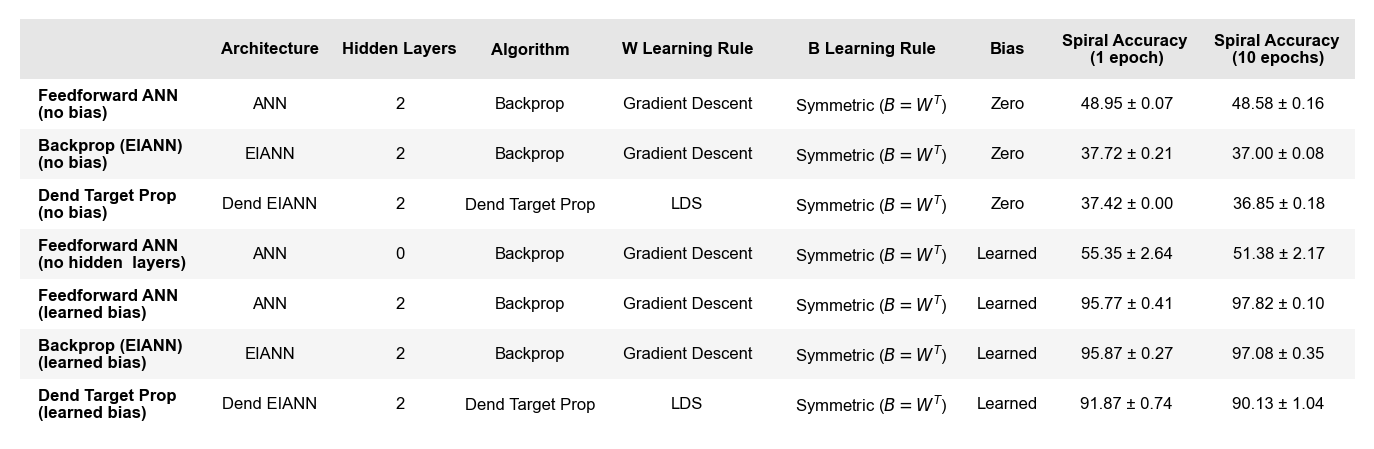

In [5]:
figure_name = "FigT2_spiral_table"
model_list = ["vanBP_2_hidden_zero_bias_spiral", "bpDale_zero_bias_spiral", "DTP_zero_bias_spiral",
              "vanBP_0_hidden_learned_bias_spiral", "vanBP_2_hidden_learned_bias_spiral", 
              "bpDale_learned_bias_spiral", "DTP_learned_bias_spiral",]
generate_hdf5_all_seeds(model_list, model_dict_all, recompute=None, dataset='spiral', variables_to_save=['test_accuracy_history', 'test_accuracy_history_extended'])
generate_model_summary_table(model_dict_all, model_list, figure_name, dataset="spiral")

## FMNIST accuracy Table

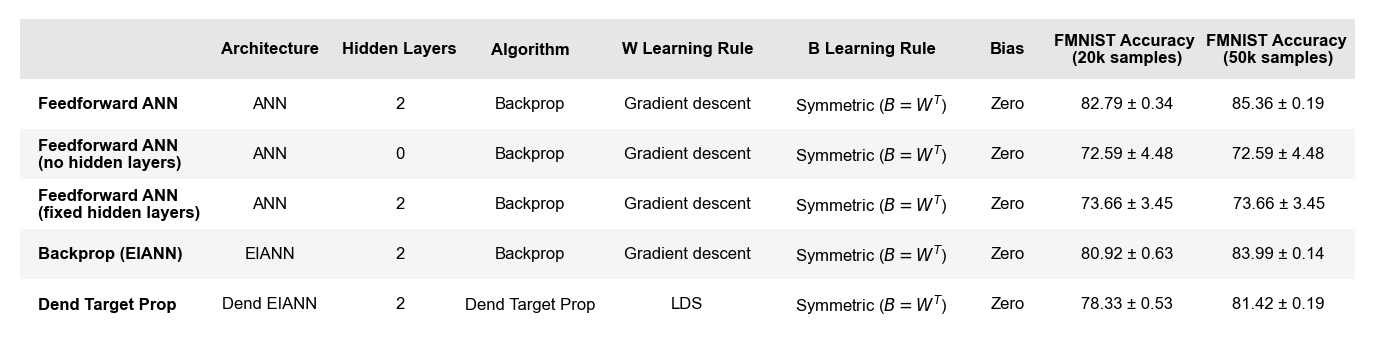

In [6]:
figure_name = "FigT7_fmnist_table"
model_list = ["fmnist_vanBP_nobias","fmnist_0hidden_vanBP_nobias", "fmnist_fixed_vanBP_nobias", "fmnist_bpDale_nobias", "fmnist_DTP_WT_hebbdend"]
generate_hdf5_all_seeds(model_list, model_dict_all, recompute=None, dataset='fmnist', variables_to_save=['test_accuracy_history', 'test_accuracy_history_extended'])
generate_model_summary_table(model_dict_all, model_list, figure_name, dataset="FMNIST")

## CIFAR10 accuracy Table

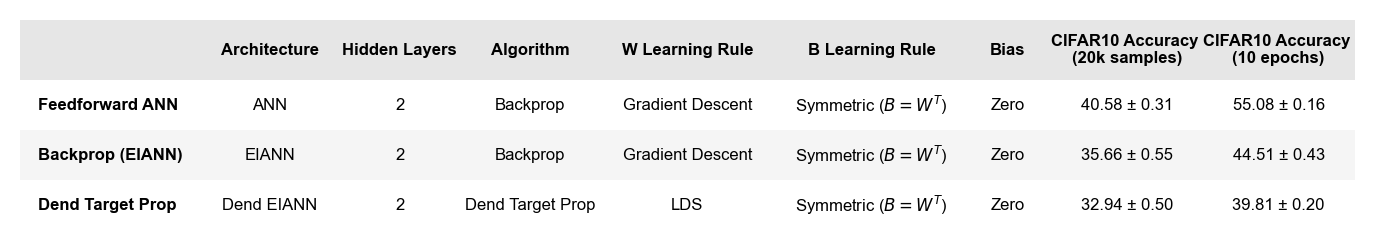

In [7]:
figure_name = "FigT7_cifar10_table"
model_list = ["vanBP_localrf_cifar", "bpDale_localrf_cifar", "DTP_localrf_cifar"]
generate_hdf5_all_seeds(model_list, model_dict_all, recompute=None, dataset='cifar10', variables_to_save=['test_accuracy_history', 'test_accuracy_history_extended'])
generate_model_summary_table(model_dict_all, model_list, figure_name, dataset="CIFAR10")